# Pathway loading in Cytoscape

We wish to create an automated Cytoscape workflow using Python and py4cytoscape in Jupyter notebooks

In order to load our pathway from WikiPathways into Cytoscape, we have a select few prerequisites:

- Downloading and starting a new Cytoscape session
- Installing the latest versions of Wikipathways, CyTargetLinker and FileTransfer. 

This can be done via Cytoscape itself by opening Apps > App Manager > Searching for required apps.
- Downloading py4cytoscape

Next, we import the following packages:

In [1]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c

import warnings
warnings.filterwarnings('ignore')


In [2]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler
import os

log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/logs/py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

#set PY4CYTOSCAPE_SUMMARY_LOGGER=True
#set_summary_logger(True)


## Defining Pathway

Once we have imported the following packages, we can make a variable to which we assign the ID of the pathway we wish to visualise in cytoscape. 

In this case, I have assigned WP5035 from WikiPathways to the variable 'WP'

In [3]:
WP = 'WP5035'

## Loading Pathway in Cytoscape

We now will load the pathway assigned to variable 'WP' in cytoscape by running the following piece of code.

In the variable cmd_list we recall all the commands we wish to run in a systematic way. 

Since we wish to load our pathway as a network, we use the command 'import-as-network'. However, if you wish to import it as a pathway, simply replace it to 'import-as-pathway'


In [4]:
cmd_list = ['wikipathways','import-as-network','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Visualising network in Jupyter Notebook

In order to visualize the output that you get in Cytoscape in the notebook, we need to import IPython and export our network as an image.

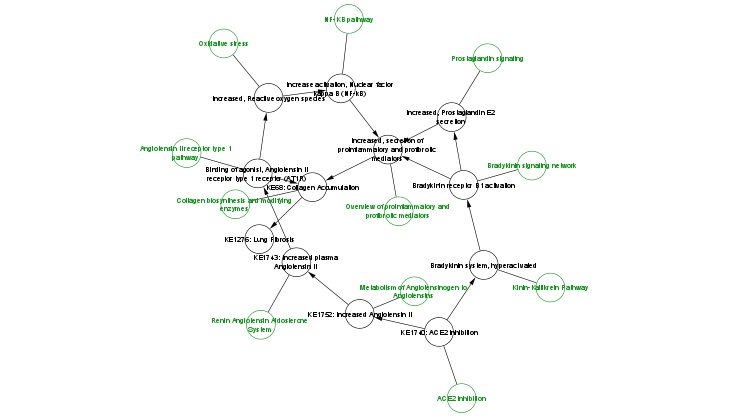

In [5]:
import IPython
p4c.export_image(filename='pathway.png')
p4c.sandbox_get_from('pathway.png')
from IPython.display import Image
Image('pathway.png')

## Network extension

Before we begin to extend our network using the linkset and CyTargetLinker, we have to identify the path where we have stored it.

In [6]:
path = 'C:/Users/Aria Jadhav/Desktop/Biomed Internship/'

linkset = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 1',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 194',
 'Added nodes: 170']

In [7]:
linkset = path + 'wikipathways-hsa-20210512-WIKIPATHWAYS.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 125',
 'Added nodes: 105']

In [8]:
linkset = path + 'wikipathways-hsa-20210512-REACTOME.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 3',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 85',
 'Added nodes: 76']

We can visualize our Cytoscape output by running the same piece of code as before and changing the file name

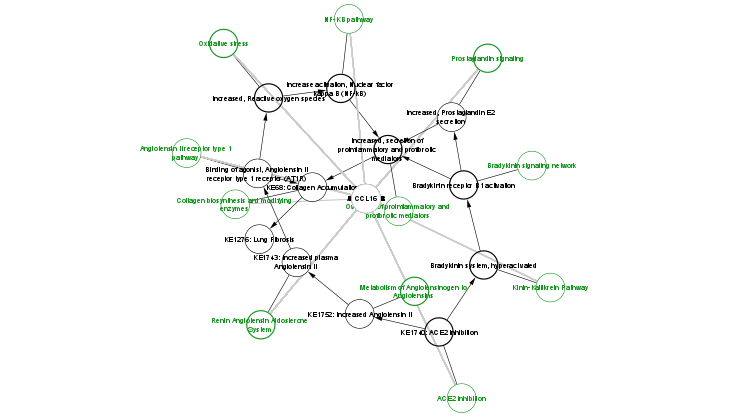

In [9]:
p4c.export_image(filename='extended_network.png')
p4c.sandbox_get_from('extended_network.png')
from IPython.display import Image
Image('extended_network.png')

## Loading and Applying Visual Style

To improve the readability of the nodes in the network, we can load a visual style file saved in the path as mentioned before.

In [10]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker_1']

 Next, we can apply this style using the following piece of code

In [11]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker_0"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens_1 (SUID: 3266)']

In [12]:
p4c.layout_network()

{}

We get the following output after applying the visual style

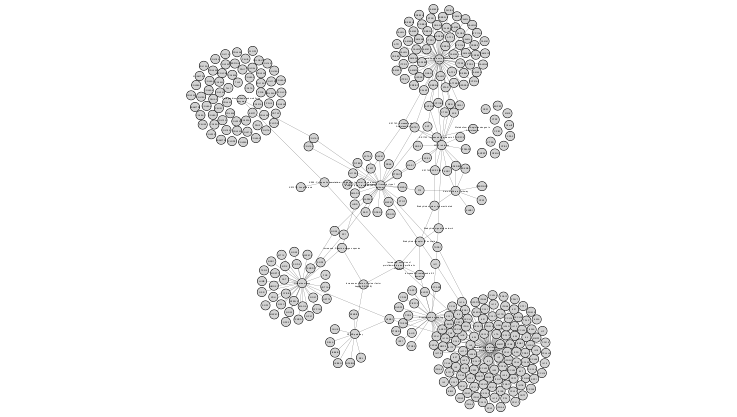

In [13]:
p4c.export_image(filename='extended_net_viz.png')
p4c.sandbox_get_from('extended_net_viz.png')
Image('extended_net_viz.png')

# Loading data expression values
We next load a file containing calculations such as: logFC, P value, FDR, etc to our network in Cytoscape by loading it as a dataframe

In [14]:
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Downloads/2021-internship-main (1)/2021-internship-main/Marvin/R-data-processing/dataExpr.csv')
dataExpr

,Name,logFC,logCPM,F,PValue,FDR
0,SAA2,2.414265,5.432500,5.120911e+02,1.410000e-12,1.880000e-08
1,CCL20,3.133684,4.949061,4.479182e+02,3.560000e-12,2.380000e-08
2,IL36G,2.722310,4.359048,3.404549e+02,2.360000e-11,1.050000e-07
3,INHBA,1.810556,6.511435,2.727932e+02,1.070000e-10,3.580000e-07
4,TNFAIP3,1.601914,7.418585,2.634266e+02,1.360000e-10,3.630000e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000135,2.994039,6.670000e-07,9.993599e-01,9.995575e-01
13346,NCKAP5L,0.000134,4.886377,6.200000e-07,9.993826e-01,9.995575e-01
13347,FBXO24,-0.000524,-0.670124,5.710000e-07,9.994077e-01,9.995575e-01
13348,IQCD,-0.000026,0.010140,3.570000e-07,9.995316e-01,9.996065e-01


In [15]:
p4c.load_table_data(dataExpr, data_key_column="Name")

'Success: Data loaded in defaultnode table'

We then retreive a list of all the column names in the node table of Cytoscape so that we do not make errors while recalling their names while coding.

In [16]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

# Visualisation
To visualise our expression data, we first deal with our logFC values.

In [17]:
logFC_score_table = p4c.get_table_columns(table='node', columns='logFC')
logFC_score_table.head()

,logFC
4097,0.128611
3586,3.13368
4610,-1.66629
4099,NaN
4612,0.303937


We then set our minimum, maximum and centre logFC values. In this case, to avoid our data being skewed, we took an upper and lower limit of +1 and -1 respectively. However, you can use the code mentioned as a comment to find the minimum, maximum and centre logFC values of your data.

Next, we used the function 'set_node_color_mapping' to allocate colours and a style to these predetermined logFC values.

In [18]:
#logFC_min = logFC_score_table.min().values[0]
#logFC_max = logFC_score_table.max().values[0]
#logFC_center = logFC_min + (logFC_max - logFC_min)/2
logFC_min = -1
logFC_max = 1
logFC_center = 0
p4c.set_visual_style('CyTargetLinker_0')

p4c.set_node_color_mapping('logFC', [logFC_min, logFC_center, logFC_max], ['#0000FF', '#FFFFFF', '#FF0000'], style_name = 'CyTargetLinker_0')

''

## P Value
Next, we visualise the P values. Here, a P value < 0.05 is considered to be significant. Since we changed the node colours to depict the logFC values, we can change the node width and colour to represent P value significance. This can be done by altering the widths in the 'set_node_border_width_mapping' function.

PValue_score_table = p4c.get_table_columns(table='node', columns='PValue')
PValue_min = PValue_score_table.min().values[0]
PValue_max = PValue_score_table.max().values[0]
p4c.set_node_border_width_mapping('PValue', table_column_values=[PValue_min, PValue_max], widths=[15, 5], style_name='CyTargetLinker_0')

In [19]:
p4c.set_node_border_width_default(5, style_name='CyTargetLinker_0')

''

p4c.set_node_shape_default('ELLIPSE', style_name='CyTargetLinker_0')
p4c.lock_node_dimensions(True, style_name='CyTargetLinker_0')
p4c.set_node_size_default(50, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#D3D3D3', style_name='CyTargetLinker_0')
p4c.set_node_border_width_default(5, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#b5b1b1', style_name='CyTargetLinker_0')
p4c.set_node_label_mapping('name', style_name='CyTargetLinker_0')
p4c.set_node_font_size_default(14, style_name='CyTargetLinker_0')

We filter for significant genes using the column filter function and show the data frame as a list so that we can visualise it on cytoscape.

In [20]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")
Sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['TLL1',
  'CCL20',
  'ITPR3',
  'COL8A1',
  'TLL2',
  'ITPR1',
  'ITPR1',
  'ITPR3',
  'ATF4',
  'CCL28',
  'CXCL1',
  'IL23A',
  'MMP9',
  'CXCL10',
  'TNF',
  'IL36A',
  'NFKBIA',
  'NFKBIE',
  'IL1RN',
  'NFE2L2',
  'MAPK10',
  'SOD2',
  'GCLC',
  'CAT',
  'MAOA',
  'GPX3',
  'XDH',
  'MT1X',
  'GSR',
  'NFIX',
  'IRF7',
  'PTGES',
  'CXCL16',
  'IL17C',
  'TGFBR2',
  'IL1A',
  'IL1B',
  'SMAD3',
  'IL6',
  'IL36G',
  'MAP2K6',
  'NFKB1',
  'CXCL5',
  'CTGF',
  'CXCL2',
  'CXCL14',
  'PPIB',
  'IL33',
  'VEGFA',
  'LIF',
  'IL15',
  'COL12A1',
  'CSF3',
  'CSF1',
  'ATP6AP2',
  'CXCL6',
  'CXCL3',
  'CALML3',
  'CALML3',
  'CALML3',
  'CSF2',
  'MMP1',
  'CES1',
  'CAMK2D',
  'CAMK2D',
  'MME'],
 'edges': None}

In [21]:
df = pd.DataFrame(Sig_gene)
df.head()

,nodes,edges
0,TLL1,None
1,CCL20,None
2,ITPR3,None
3,COL8A1,None
4,TLL2,None


In [22]:
sig_gene_exp_list = df['nodes'].tolist()
#print(sig_gene_exp_list)
print(f"\nsig_gene_exp_list:\n{sig_gene_exp_list}\ntype:{type(sig_gene_exp_list)}")


sig_gene_exp_list:
['TLL1', 'CCL20', 'ITPR3', 'COL8A1', 'TLL2', 'ITPR1', 'ITPR1', 'ITPR3', 'ATF4', 'CCL28', 'CXCL1', 'IL23A', 'MMP9', 'CXCL10', 'TNF', 'IL36A', 'NFKBIA', 'NFKBIE', 'IL1RN', 'NFE2L2', 'MAPK10', 'SOD2', 'GCLC', 'CAT', 'MAOA', 'GPX3', 'XDH', 'MT1X', 'GSR', 'NFIX', 'IRF7', 'PTGES', 'CXCL16', 'IL17C', 'TGFBR2', 'IL1A', 'IL1B', 'SMAD3', 'IL6', 'IL36G', 'MAP2K6', 'NFKB1', 'CXCL5', 'CTGF', 'CXCL2', 'CXCL14', 'PPIB', 'IL33', 'VEGFA', 'LIF', 'IL15', 'COL12A1', 'CSF3', 'CSF1', 'ATP6AP2', 'CXCL6', 'CXCL3', 'CALML3', 'CALML3', 'CALML3', 'CSF2', 'MMP1', 'CES1', 'CAMK2D', 'CAMK2D', 'MME']
type:<class 'list'>


Here, we set the node border width and border colour since we only want the significant genes to have an altered border width and colour.

In [23]:
p4c.set_node_border_color_bypass(sig_gene_exp_list, "#00FF2A")
p4c.set_node_border_width_bypass(sig_gene_exp_list, 15)

''

In [24]:
p4c.layout_network('force-directed')

{}

We can now retreive the image of our network on Cytoscape.

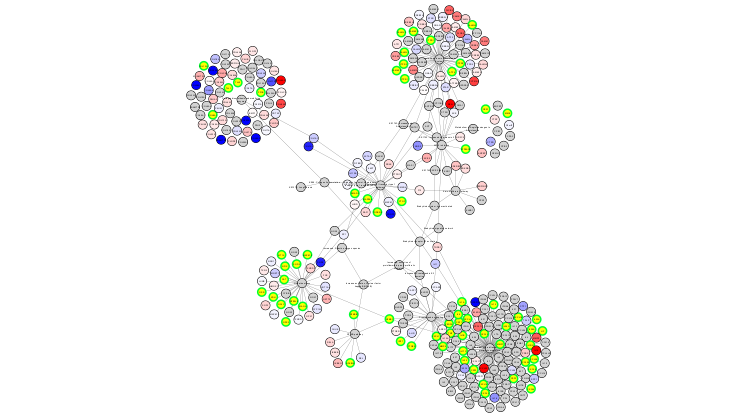

In [25]:
p4c.export_image(filename='data_net_viz.png')
p4c.sandbox_get_from('data_net_viz.png')
Image('data_net_viz.png')

# Filtering Empty Nodes
There are some genes that do not have a logFC value. In order to clear up the network to improve readability, it is better if we identify these nodes and remove them from the network. We first identify the maximum and minimum logFC values of the dataExpr table. Then, we create a column filter that filters the nodes that fall out of this range.

In [26]:
logFC_min_filter = logFC_score_table.min().values[0]
logFC_max_filter = logFC_score_table.max().values[0]

print(logFC_min_filter)
print(logFC_max_filter)

-1.6662939469999998
4.798713519


In [27]:
#myFilter= p4c.create_column_filter('myFilter', 'logFC', [-1.6662939469999998,4.798713519], "IS_NOT_BETWEEN")
myFilter= p4c.create_column_filter('myFilter', 'logFC', [-2,5], "IS_NOT_BETWEEN")
myFilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CAMK2A',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'IL2',
  'COL24A1',
  'IL17F',
  'EPO',
  'CREB3L3',
  'IFNA21',
  'CREB3L3',
  'IL17A',
  'P3H3',
  'IFNL1',
  'COLGALT2',
  'CCR2',
  'IFNA6',
  'COL6A6',
  'PTGER2',
  'COL6A5',
  'CCL25',
  'COL20A1',
  'CCL3',
  'CPB1',
  'CPA3',
  'EBI3',
  'ENPEP',
  'IL26',
  'CD28',
  'IFNL2',
  'KLRD1',
  'CCL16',
  'CCL1',
  'HSD3B1',
  'NLRP3',
  'HSD3B2',
  'IL24',
  'HSD3B2',
  'PIK3CG',
  'CCL8',
  'HSD3B1',
  'CAMK1G',
  'CAMK1G',
  'CXCL13',
  'IFNA2',
  'IL4',
  'IL13',
  'LTA',
  'CCL14',
  'CCL3L3',
  'XCL2',
  'IL17B',
  'CYBB',
  'XCL1',
  'IL31',
  'PF4V1',
  'Overview of proinflammatory and profibrotic mediators',
  'Kinin-Kallikrein Pathway',
  'Increased, Prostaglandin E2 secretion',
  'ACE2 inhibition',
  'Angiotensin II receptor type 1 pathway',
  'Binding of agonist, Angiotensin II receptor type 1 receptor (AT1R)',
  'Collagen biosynthesis and modifying enzymes',
  'KE1276: Lung Fibrosis',
  'KE68: Collagen Accumula

We can see in the output above that the KE nodes of our AOP have also been selected, which is not what we want. So, we create a second filter to identity just the genes in the CTL.Type column of the node table.

In [28]:
myFilter1 = p4c.create_column_filter('myFilter1', 'CTL.Type', "gene", "IS")
myFilter1

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CREB3',
  'TLL1',
  'CCL20',
  'CAMK2A',
  'ADAMTS14',
  'CAMK2A',
  'TNFSF13B',
  'COL4A3',
  'CAMK2B',
  'AHR',
  'ADAMTS3',
  'CAMK2B',
  'IL2',
  'COL4A5',
  'CREB3',
  'CASP1',
  'PCOLCE',
  'CREB3L1',
  'CCL22',
  'COL24A1',
  'ITPR3',
  'IL17F',
  'COL8A2',
  'CREB3L1',
  'EPO',
  'COL8A1',
  'CREB3L3',
  'COL27A1',
  'IFNA21',
  'CREB3L3',
  'TLL2',
  'GNAQ',
  'IL17A',
  'COL6A3',
  'GNAQ',
  'P3H3',
  'IFNL1',
  'ITPR1',
  'COLGALT2',
  'CCR2',
  'ITPR1',
  'P4HA3',
  'IFNA6',
  'ITPR3',
  'COL6A6',
  'PTGER2',
  'ATF2',
  'COL6A5',
  'CCL25',
  'ATF4',
  'COL20A1',
  'CALM1',
  'CCL28',
  'PLOD3',
  'CREB1',
  'COL28A1',
  'SPP1',
  'CREB3L2',
  'COL21A1',
  'CXCL1',
  'CREB3L2',
  'COL22A1',
  'IL23A',
  'PCOLCE2',
  'CREB3L4',
  'CCL3',
  'CPB1',
  'CREB5',
  'MMP9',
  'CPA3',
  'CREB5',
  'EBI3',
  'ENPEP',
  'CALM2',
  'C9orf3',
  'IL26',
  'CALM3',
  'CALML4',
  'IL19',
  'CALML4',
  'CD28',
  'CALML5',
  'IFNL2',
  'CALML6',
  'KLRD1',
  'ITPR2',
  'CCL16',

myFilter2 = []
for item in myFilter['nodes']: 
    if item in myFilter1['nodes']:
        myFilter2.append(item)
        
print (myFilter2)

p4c.delete_selected_nodes(network='CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens')

Now, we can combine both these filters to only select the genes with no logFC values in the network. We can then go ahead and remove them.

In [29]:
final_filter = p4c.create_composite_filter('final_filter', ['myFilter', 'myFilter1'])
final_filter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['CAMK2A',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'IL2',
  'COL24A1',
  'IL17F',
  'EPO',
  'CREB3L3',
  'IFNA21',
  'CREB3L3',
  'IL17A',
  'P3H3',
  'IFNL1',
  'COLGALT2',
  'CCR2',
  'IFNA6',
  'COL6A6',
  'PTGER2',
  'COL6A5',
  'CCL25',
  'COL20A1',
  'CCL3',
  'CPB1',
  'CPA3',
  'EBI3',
  'ENPEP',
  'IL26',
  'CD28',
  'IFNL2',
  'KLRD1',
  'CCL16',
  'CCL1',
  'HSD3B1',
  'NLRP3',
  'HSD3B2',
  'IL24',
  'HSD3B2',
  'PIK3CG',
  'CCL8',
  'HSD3B1',
  'CAMK1G',
  'CAMK1G',
  'CXCL13',
  'IFNA2',
  'IL4',
  'IL13',
  'LTA',
  'CCL14',
  'CCL3L3',
  'XCL2',
  'IL17B',
  'CYBB',
  'XCL1',
  'IL31',
  'PF4V1',
  'NOX1',
  'NOX5',
  'NOX3',
  'IL37',
  'IFNL3',
  'RACK1',
  'PF4',
  'CCL23',
  'CCL21',
  'NOX4',
  'IL17D',
  'MAS1',
  'IL27',
  'IFNA16',
  'AGT',
  'IFNA4',
  'CCL2',
  'CXCL12',
  'CXCL9',
  'IL25',
  'AGTR1',
  'CXCL8',
  'IFNG',
  'IFNA8',
  'CCL7',
  'CCL11',
  'CPN1',
  'OSM',
  'COL3A1',
  'KNG1',
  'CCL4',
  'CCL18',
  'KLKB1',
  'COL11A1',
  'IL10',
  

In [30]:
p4c.delete_selected_nodes()

In commands_post(): java.lang.NullPointerException


CyError: In commands_post(): java.lang.NullPointerException